In [1]:
import matplotlib.pyplot as plt
import numpy as np

from Windowing import *
import seaborn as sns
from Plotting import Meanplots

# 0. Introduction
We will use this to make our plots for the regression and multi-class prediction settings

# 1. Load data

In [2]:
win = Windowing(aggCurves)
win.set_points([16,   23,   32,   45,   64,   91,  128,  181,  256,  362,  512,
        724, 1024, 1448, 2048, 2896, 4096])

win.MDS()
win.MMF(steps = 4000, lr = 0.01)
win.Last()

,Count
size_train,
16,245
23,246
32,246
40,1
45,244
...,...
1048576,2
1482910,1
1486391,1


# 2. Plot

In [3]:
# since we don't have a nice heatmap function, we will do this by hand
MMF = win.results['MMF']['test error']
MDS = win.results['MDS']['test error']
Last = win.results['Last']['test error']

averagesMMF = np.nanmean(MMF, axis = 0)
averagesMDS = np.nanmean(MDS, axis = 0)
averagesLast = np.nanmean(Last, axis = 0)



MDSvsMMF =  MDS - MMF
averagesMDSvsMMF = np.nanmean(MDSvsMMF, axis = 0)
MDSvsLast =  MDS - Last
averagesMDSvsLast = np.nanmean(MDSvsLast, axis = 0)
MMFvsLast =  MMF - Last
averagesMMFvsLast = np.nanmean(MMFvsLast, axis = 0)


C:\Users\lkiel\AppData\Local\Temp\ipykernel_3212\80844446.py:6: RuntimeWarning: Mean of empty slice
  averagesMMF = np.nanmean(MMF, axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_3212\80844446.py:7: RuntimeWarning: Mean of empty slice
  averagesMDS = np.nanmean(MDS, axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_3212\80844446.py:8: RuntimeWarning: Mean of empty slice
  averagesLast = np.nanmean(Last, axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_3212\80844446.py:13: RuntimeWarning: Mean of empty slice
  averagesMDSvsMMF = np.nanmean(MDSvsMMF, axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_3212\80844446.py:15: RuntimeWarning: Mean of empty slice
  averagesMDSvsLast = np.nanmean(MDSvsLast, axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_3212\80844446.py:17: RuntimeWarning: Mean of empty slice
  averagesMMFvsLast = np.nanmean(MMFvsLast, axis = 0)


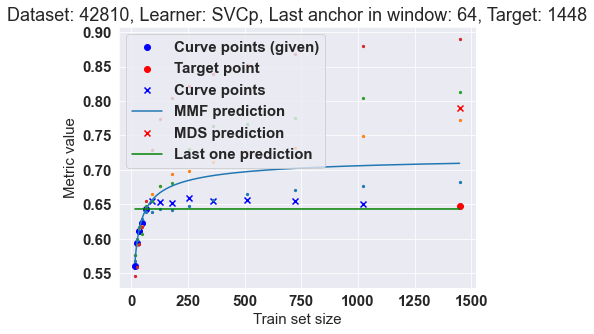

In [36]:
win.PlotCurveAndPrediction(-1,1,4,-4)

In [4]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams.update({'font.weight': 'bold'})

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from MainFiles.deprecated_Methods_fixed_window_size import Slearners

def Boxplots(plots, ylabel=None, xlabel=None, hline='N', xrot=False, ylim=None, figsize=(1, 1),
             col=['black', 'red', 'blue', 'green'], legend_loc='upper right', title=None, means=False, save=None, dpi=800):
    plotlabels = list(plots.keys())
    w, h = *figsize,
    fig, ax = plt.subplots(figsize=(6.4 * w, 4.8 * h))
    if ylim:
        ax.set_ylim(*ylim)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=15, fontweight='bold')
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=15, fontweight='bold')
    if hline != 'N':
        plt.axhline(hline, linestyle='--')
    if title:
        fig.suptitle(title, y=1, fontsize=20, fontweight='bold')

    n_dicts = len(plots)
    if type(plots[plotlabels[0]]) != dict:
        n_dicts = 1
    boxes = []
    for i in range(n_dicts):
        c = col[i]
        if n_dicts == 1:
            labels, data = [*zip(*plots.items())]
        else:
            labels, data = [*zip(*plots[plotlabels[i]].items())]
        data = [np.array(dat)[~np.isnan(np.array(dat))] for dat in data]
        pos = np.arange(0, len(labels)) * n_dicts + 1 + i
        tempbox = ax.boxplot(data, positions=pos, showmeans=means, patch_artist=True,
                             boxprops=dict(facecolor='white', color=c),
                             capprops=dict(color=c),
                             whiskerprops=dict(color=c),
                             flierprops=dict(color=c, markeredgecolor=c)
                             )
        boxes.append(tempbox)
    pos = np.arange(0, len(labels)) * n_dicts + 1 + (n_dicts - 1) / 2
    ax.set_xticks(pos)
    if xrot:
        ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=15, fontweight='bold')
    else:
        ax.set_xticklabels(labels, fontsize=15, fontweight='bold')
    if n_dicts != 1:
        ax.legend([box["boxes"][0] for box in boxes], plotlabels, loc=legend_loc)
    if save:
        plt.savefig(save, dpi=dpi)
    plt.show()

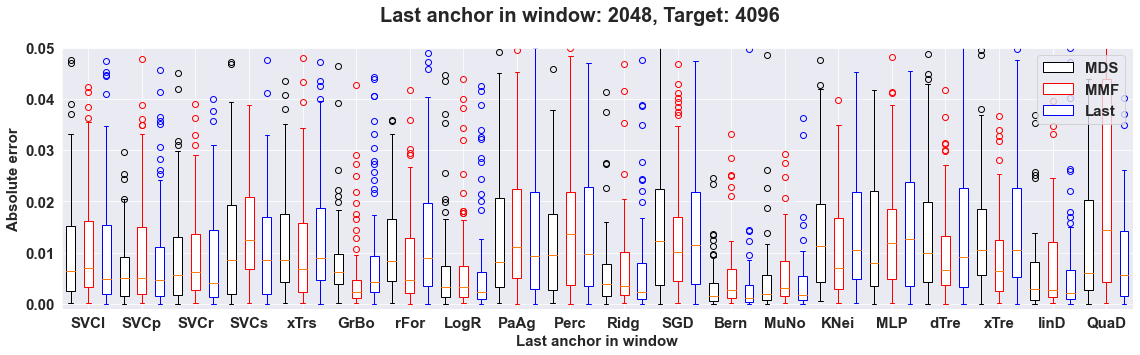

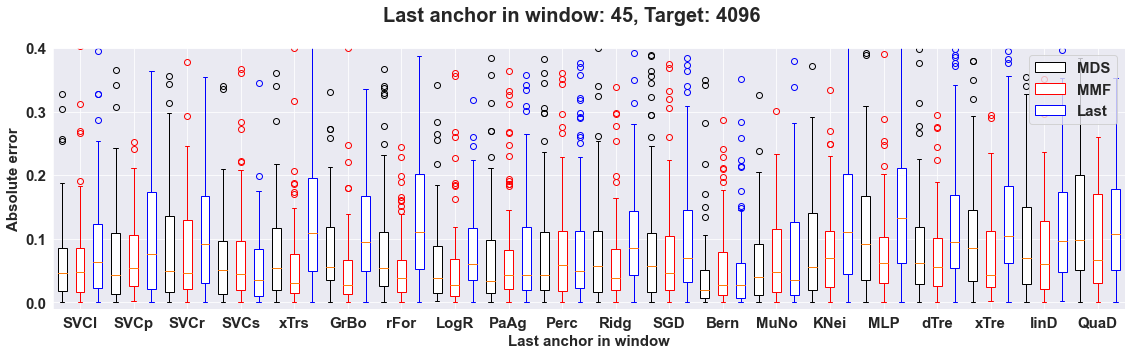

In [18]:
for i,duo in enumerate([(-2,-1),(3,-1)]):
    Win, Target = duo
    if i == 1:
        ylim = (-0.01, 0.4)
    else:
        ylim = (-0.001, 0.05)
    plots = {}
    ind = range(len(win.Slearners))
    plots['MDS'] = {win.Slearners[i]: MMF[:,i,Win,Target] for i in ind}
    plots['MMF'] = {win.Slearners[i]: MDS[:,i,Win,Target] for i in ind}
    plots['Last'] = {win.Slearners[i]: Last[:,i,Win,Target] for i in ind}

    path = '..\Plots\RegressionAggregation1\RegressionAggregation1win{}target{}.png'.format(Win, Target)
    title = ('Last anchor in window: {}, Target: {}'.format(win.train_anchors[Win],win.target_anchors[Target]))
    Boxplots(plots, ylim = ylim, title = title, figsize=(3, 1), xlabel='Last anchor in window', ylabel='Absolute error', save = path, dpi=300)

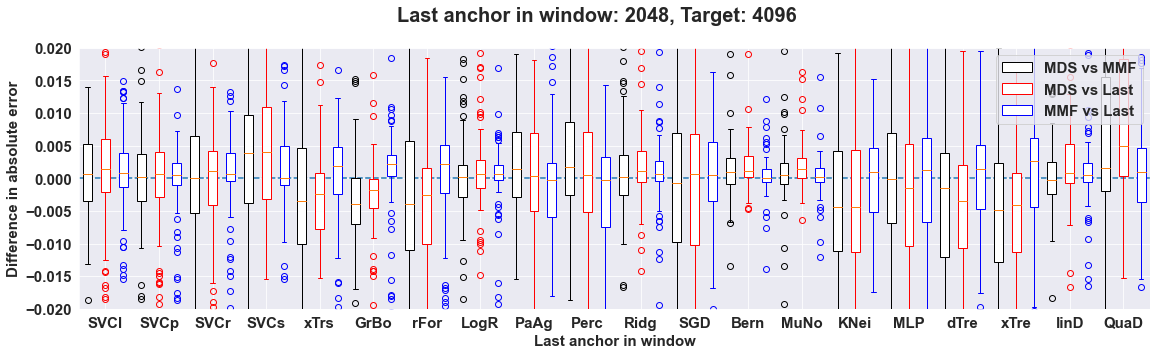

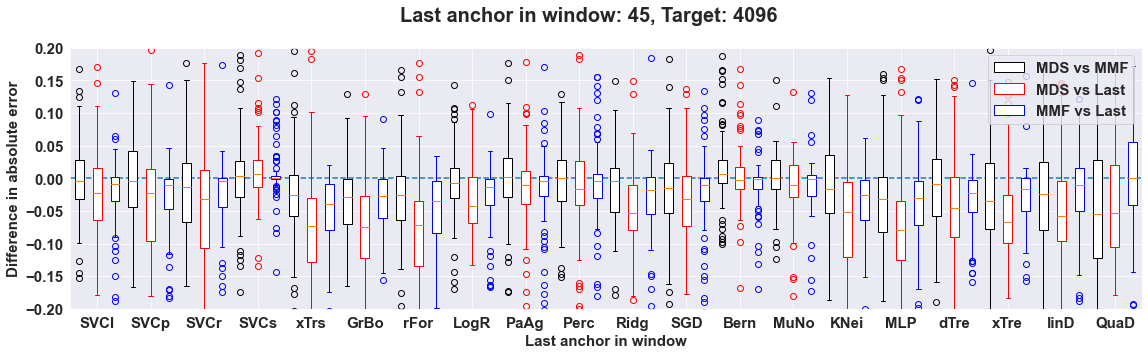

In [21]:
for i,duo in enumerate([(-2,-1),(3,-1)]):
    Win, Target = duo
    if i == 1:
        ylim = (-0.2, 0.2)
    else:
        ylim = (-0.02, 0.02)

    plots = {}
    ind = range(len(win.Slearners))
    plots['MDS vs MMF'] = {win.Slearners[i]: MDSvsMMF[:,i,Win,Target] for i in ind}
    plots['MDS vs Last'] = {win.Slearners[i]: MDSvsLast[:,i,Win,Target] for i in ind}
    plots['MMF vs Last'] = {win.Slearners[i]: MMFvsLast[:,i,Win,Target] for i in ind}

    path = '..\Plots\RegressionAggregation1\RegressionAggregation1win{}target{}vs.png'.format(Win, Target)
    title = ('Last anchor in window: {}, Target: {}'.format(win.train_anchors[Win],win.target_anchors[Target]))
    Boxplots(plots, ylim = ylim, title = title, figsize=(3, 1), xlabel='Last anchor in window', ylabel='Difference in absolute error', hline = 0, save = path, dpi=300)

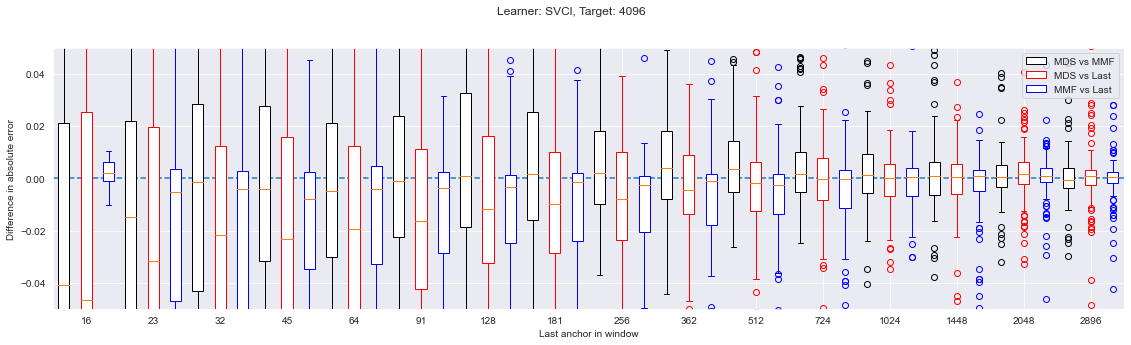

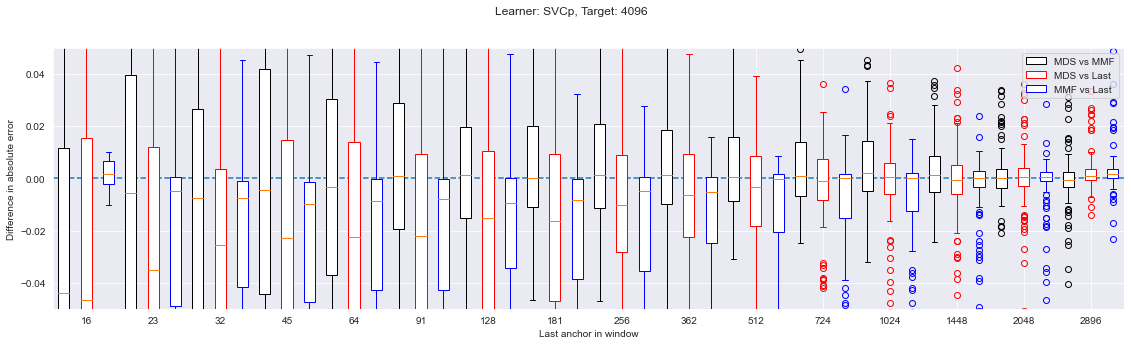

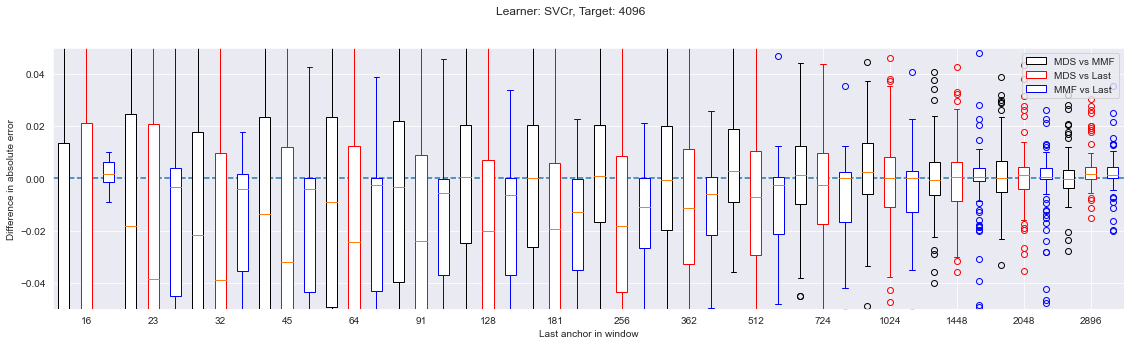

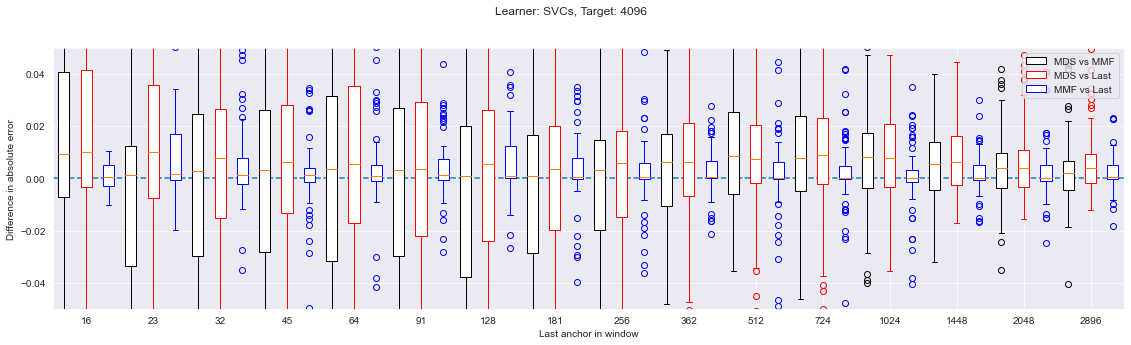

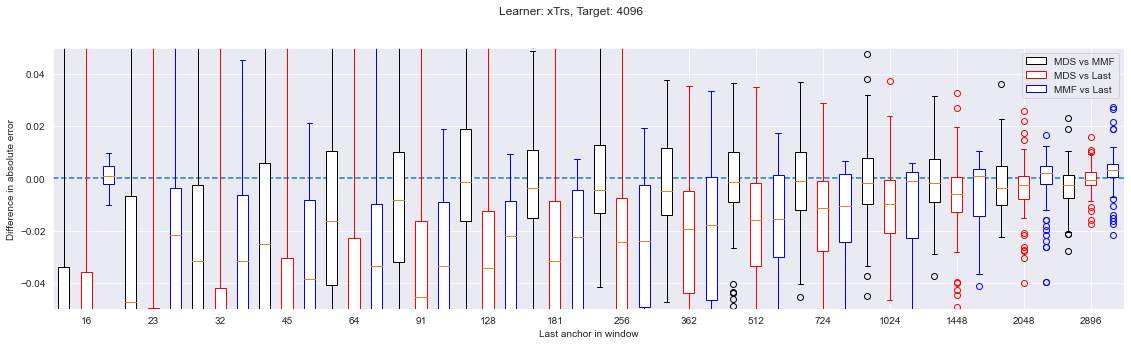

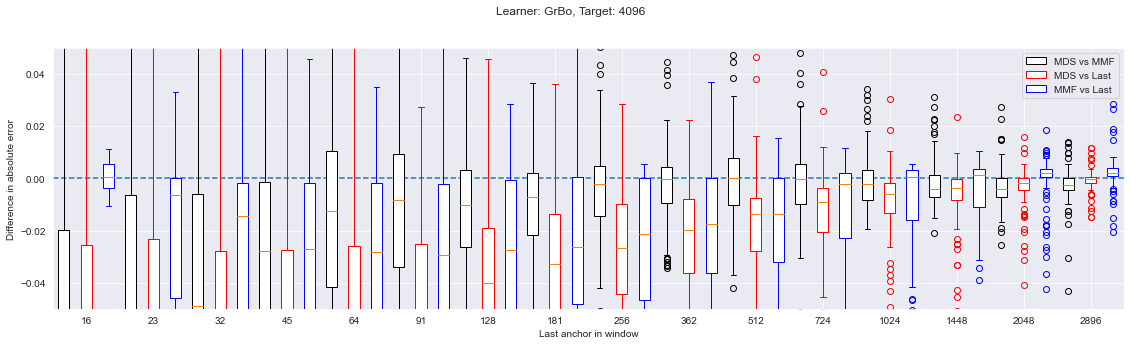

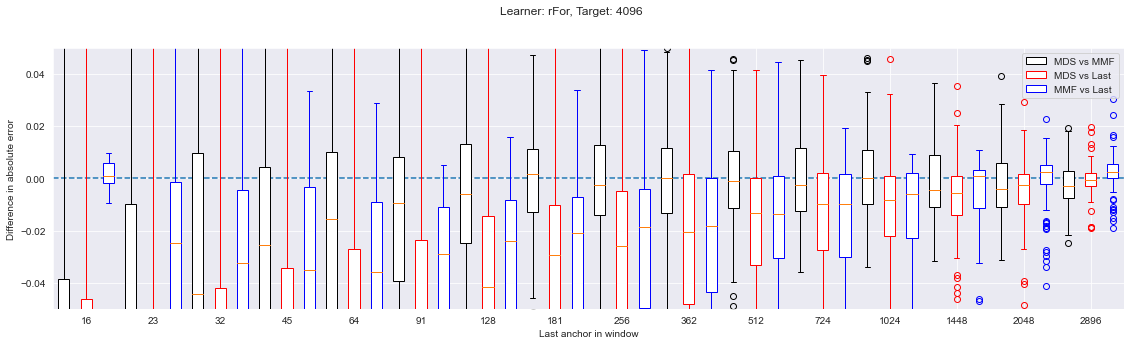

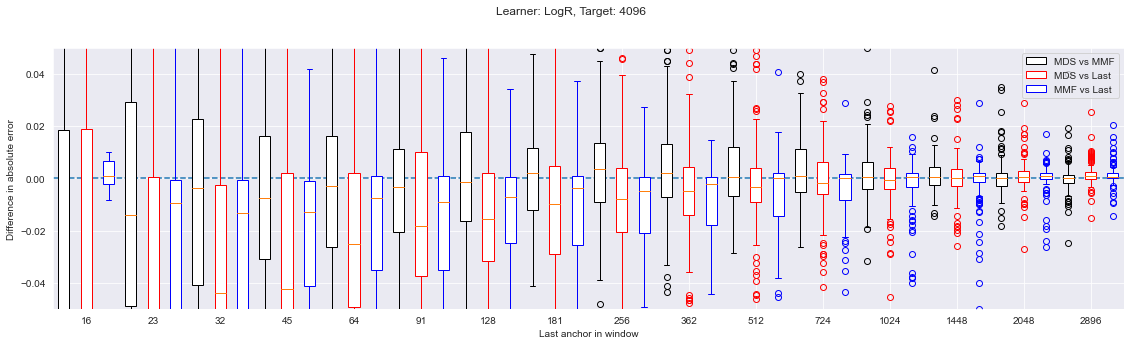

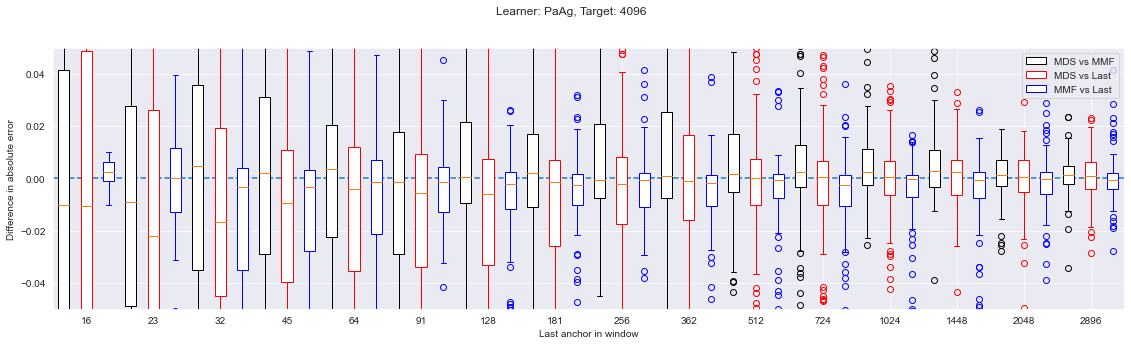

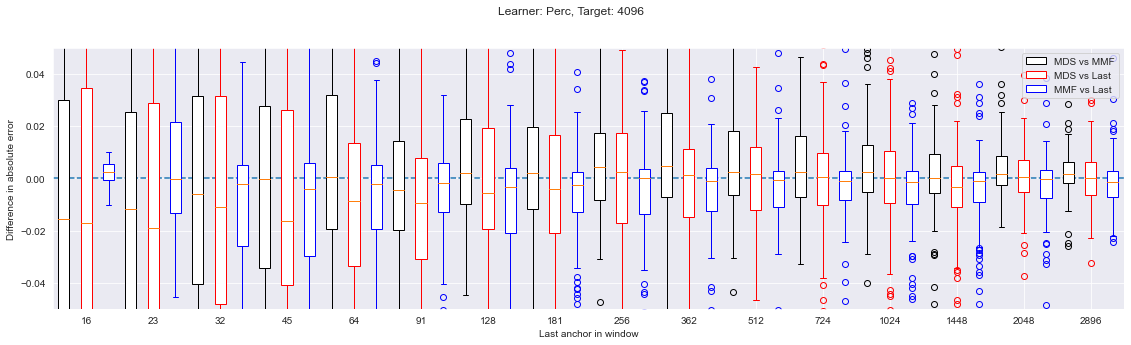

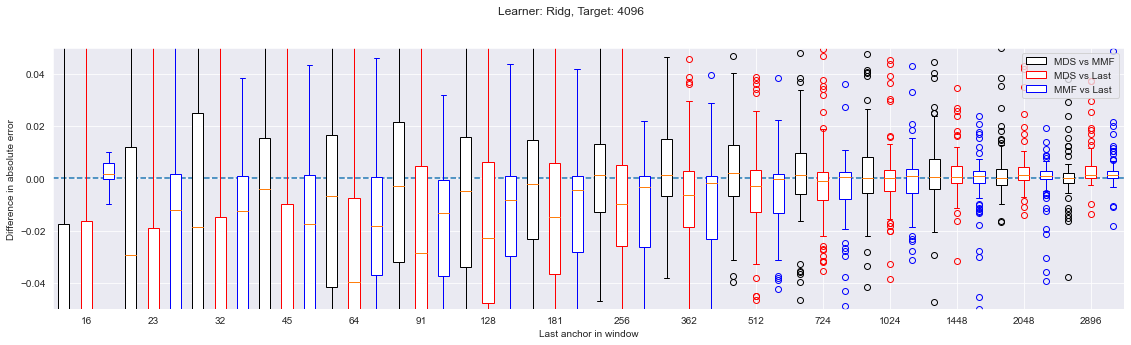

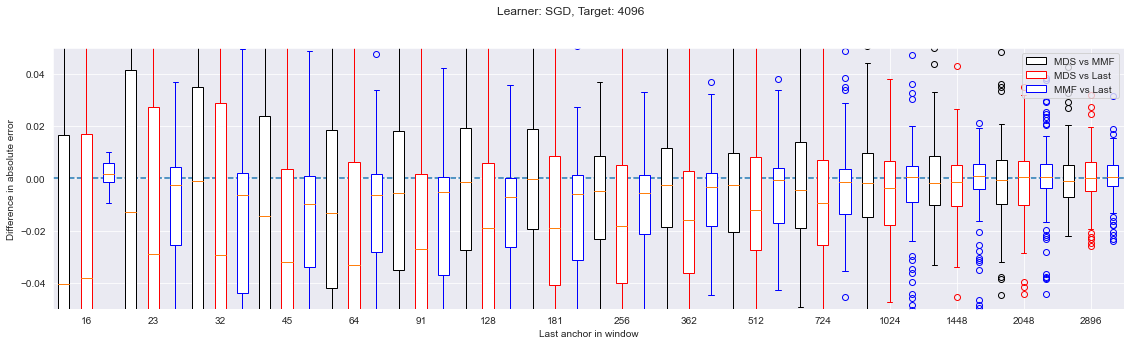

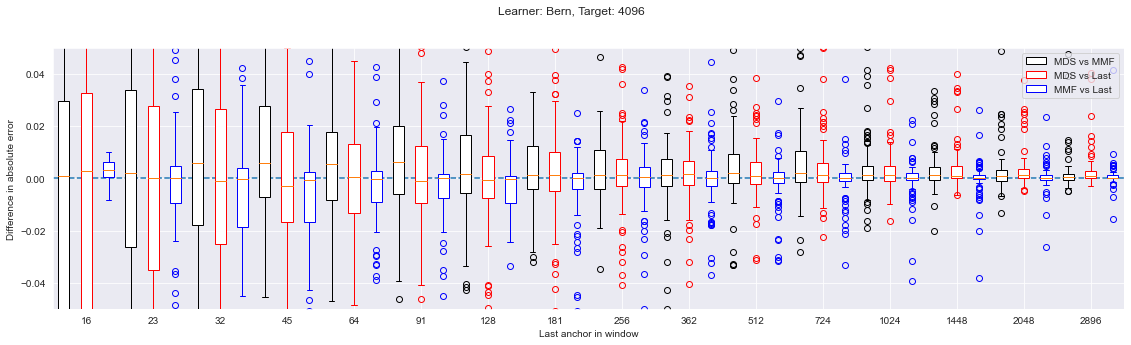

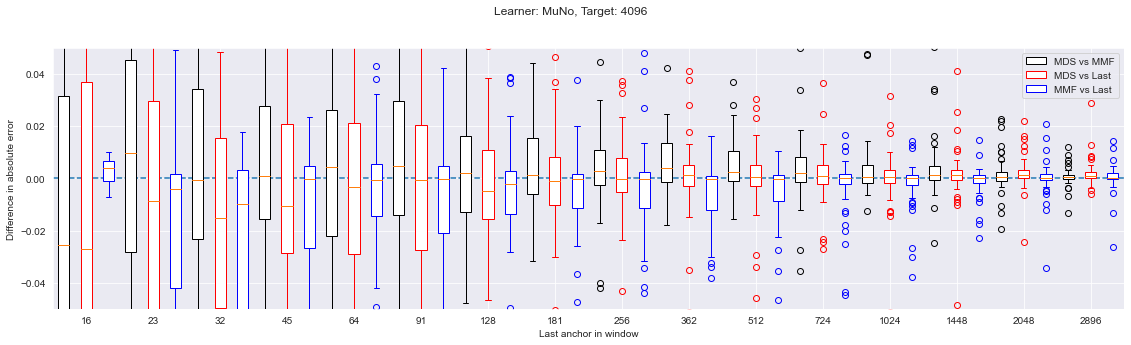

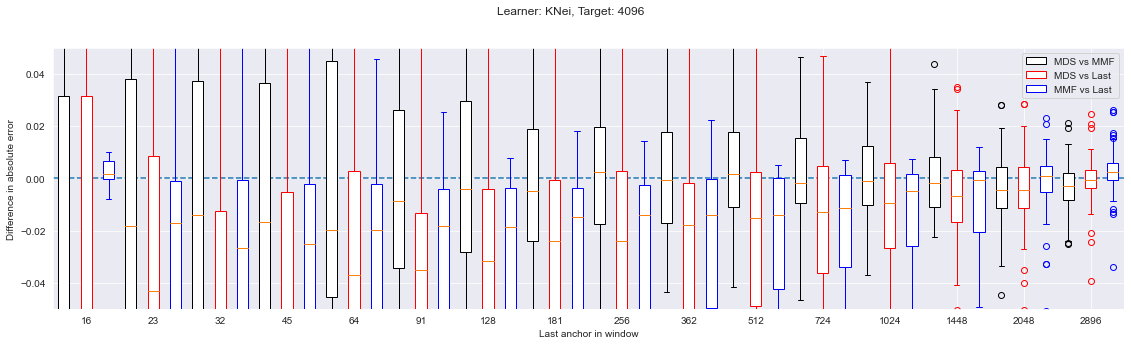

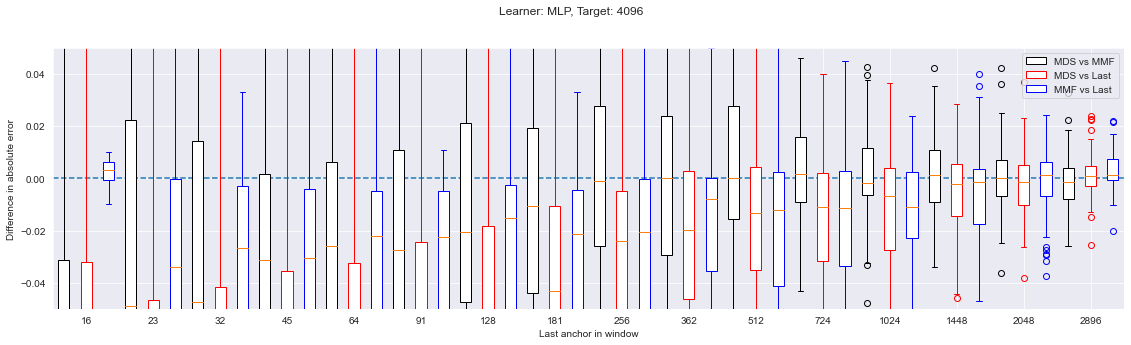

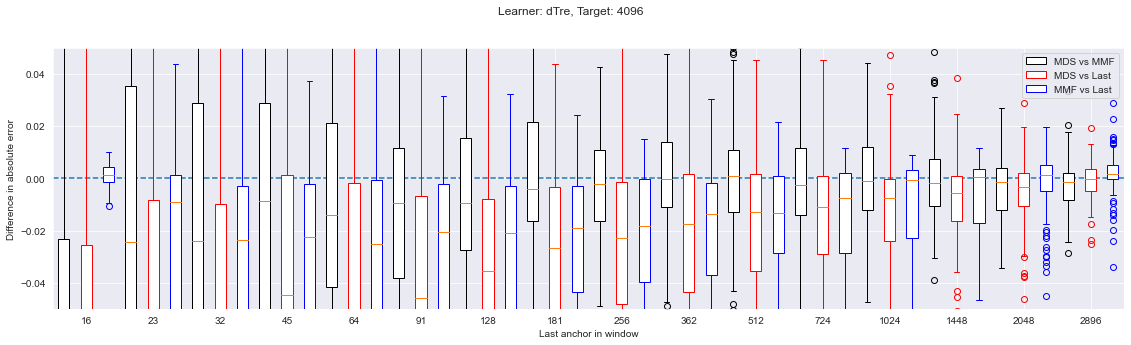

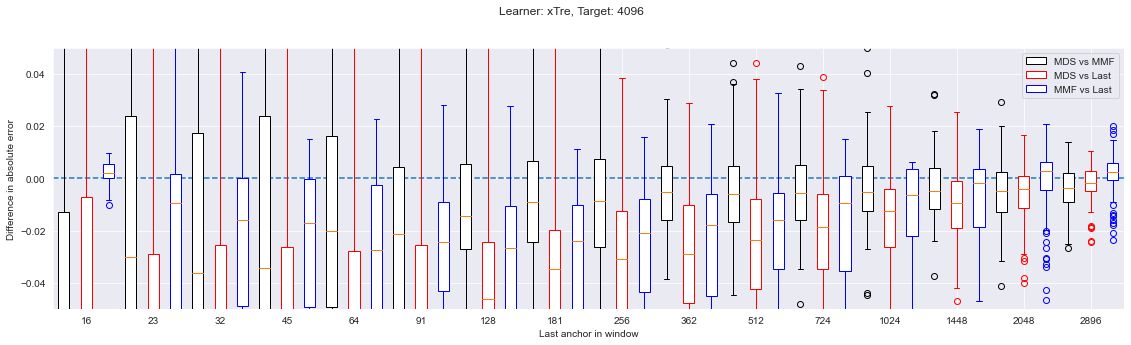

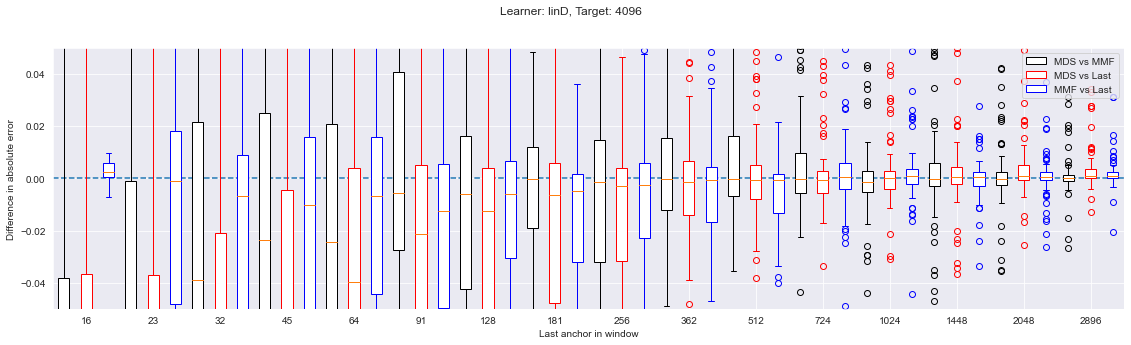

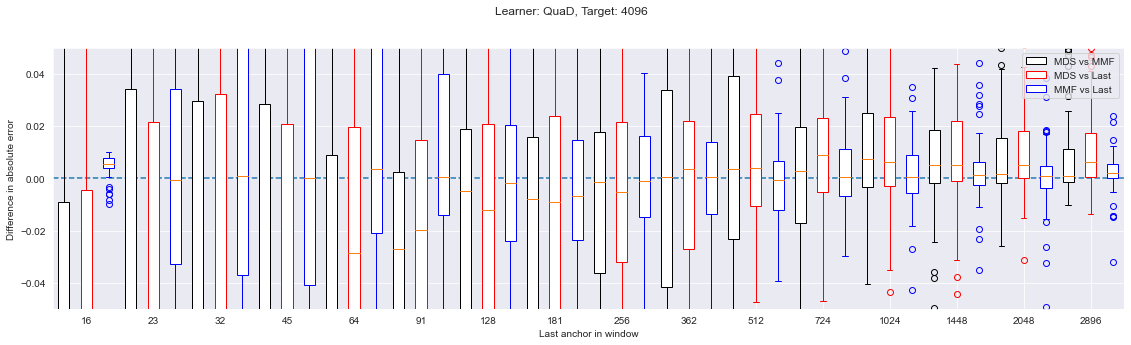

In [61]:
Target = -1
for learner in range(len(win.Slearners)):
    plots = {}
    ind = range(len(win.train_anchors))

    plots['MDS vs MMF'] = {str(win.train_anchors[i]): MDSvsMMF[:,learner,i,Target] for i in ind}
    plots['MDS vs Last'] = {str(win.train_anchors[i]): MDSvsLast[:,learner,i,Target] for i in ind}
    plots['MMF vs Last'] = {str(win.train_anchors[i]): MMFvsLast[:,learner,i,Target] for i in ind}

    path = '..\Plots\Appendix\Appendixlearner{}target{}zoomvs.png'.format(win.Slearners[learner], Target)
    title = 'Learner: {}, Target: {}'.format(win.Slearners[learner],win.target_anchors[Target])
    Boxplots(plots, ylim = (-0.05,0.05), title = title, figsize=(3, 1), xlabel='Last anchor in window', ylabel='Difference in absolute error', hline = 0, save = path, dpi=300)

In [9]:
def Meanplots(plots, ylabel=None, xlabel=None, hline='N', xrot=False, ylim=None, figsize=(1, 1),
             col=['black', 'red', 'blue', 'green'], legend_loc='upper right', title=None, save=None, dpi=800, Q1Q3=True, median=True, ls='--'):
    plotlabels = list(plots.keys())
    w, h = *figsize,
    fig, ax = plt.subplots(figsize=(6.4 * w, 4.8 * h))
    if ylim:
        ax.set_ylim(*ylim)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=15, fontweight='bold')
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=15, fontweight='bold')
    if hline != 'N':
        plt.axhline(hline, linestyle=ls)
    if title:
        fig.suptitle(title, y=1, fontsize=20, fontweight='bold')

    n_dicts = len(plots)
    if type(plots[plotlabels[0]]) != dict:
        n_dicts = 1
    for i in range(n_dicts):
        c = col[i]
        if n_dicts == 1:
            labels, data = [*zip(*plots.items())]
        else:
            labels, data = [*zip(*plots[plotlabels[i]].items())]
        data = [np.array(dat)[~np.isnan(np.array(dat))] for dat in data]
        means = [np.mean(dat) for dat in data]
        ax.plot(means, c=c, label=plotlabels[i])
        #dotted line
        if median:
            medians = [np.quantile(dat, 0.5) for dat in data]
            ax.plot(medians, c=c, linestyle='dotted')
        if Q1Q3:
            q1s = [np.quantile(dat, 0.25) for dat in data]
            q3s = [np.quantile(dat, 0.75) for dat in data]
            ax.fill_between(range(len(labels)), q1s, q3s, alpha=0.2, color=c)
    pos = np.arange(0, len(labels))
    ax.set_xticks(pos)
    if xrot:
        ax.set_xticklabels(labels, rotation=45, ha='right')
    else:
        ax.set_xticklabels(labels)
    if n_dicts != 1:
        ax.legend(loc=legend_loc)
    if save:
        plt.savefig(save, dpi=dpi)
    plt.show()

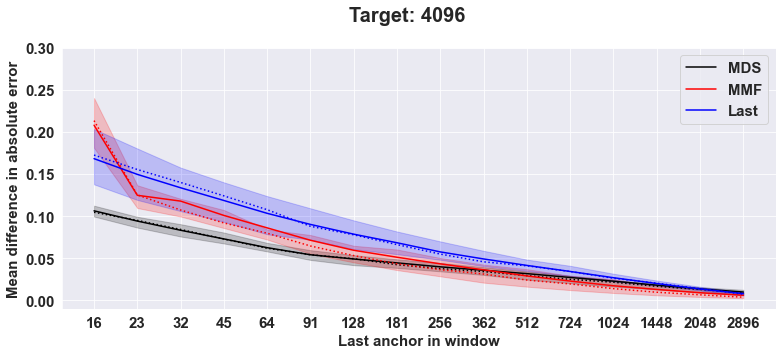

In [10]:
Target = -1

plots = {}
if Target != -1:
    ind = range(len(win.train_anchors))[:Target+1]
else:
    ind = range(len(win.train_anchors))

plots['MDS'] = {str(win.train_anchors[i]): averagesMDS[:,i,Target] for i in ind}
plots['MMF'] = {str(win.train_anchors[i]): averagesMMF[:,i,Target] for i in ind}
plots['Last'] = {str(win.train_anchors[i]): averagesLast[:,i,Target] for i in ind}

path = '..\Plots\RegressionAggregation2\RegressionAggregation2target{}.png'.format(Target)

title = 'Target: {}'.format(win.target_anchors[Target])

Meanplots(plots, ylim = (-0.01,0.3), title = title, figsize=(2, 1), xlabel='Last anchor in window', ylabel='Mean difference in absolute error')#, save = path, dpi=300, legend_loc='upper left')

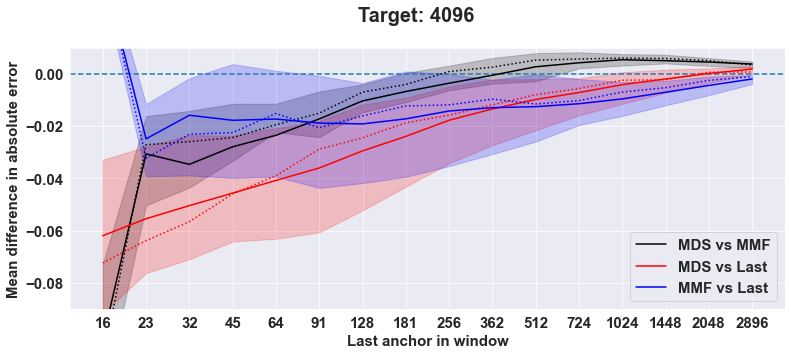

In [37]:
Target = -1

plots = {}
if Target != -1:
    ind = range(len(win.train_anchors))[:Target+1]
else:
    ind = range(len(win.train_anchors))

plots['MDS vs MMF'] = {str(win.train_anchors[i]): averagesMDSvsMMF[:,i,Target] for i in ind}
plots['MDS vs Last'] = {str(win.train_anchors[i]): averagesMDSvsLast[:,i,Target] for i in ind}
plots['MMF vs Last'] = {str(win.train_anchors[i]): averagesMMFvsLast[:,i,Target] for i in ind}

path = '..\Plots\RegressionAggregation2\RegressionAggregation2target{}zoomVs.png'.format(Target)

title = 'Target: {}'.format(win.target_anchors[Target])

Meanplots(plots, ylim = (-0.09,0.01), title = title, figsize=(2, 1), xlabel='Last anchor in window', ylabel='Mean difference in absolute error', hline = 0, legend_loc='lower right')#, save = path, dpi=300)

In [8]:
# To use in vmin and vmax
print(np.nanmax(averagesMMF))
print(np.nanmax(averagesMDS))
print(np.nanmax(averagesLast))
print('\n')
print(np.nanmin(averagesMMFvsMDS))
print(np.nanmax(averagesMMFvsMDS))

0.16754366
0.10405420508480231
0.1614487145958996


-0.061383517839314866
0.00392142790713486


In [68]:
averagesMDSvsMMF.shape

(20, 16, 16)

In [13]:
print(np.nanmax(averagesMDSvsMMF))
print(np.nanmax(averagesMDSvsLast))
print(np.nanmax(averagesMMFvsLast))
print(np.nanmin(averagesMDSvsMMF))
print(np.nanmin(averagesMDSvsLast))
print(np.nanmin(averagesMMFvsLast))

0.020239651257134235
0.018979588070209833
0.05177923357129625
-0.11869212348421286
-0.11694266625638358
-0.06216464829891063


C:\Users\lkiel\AppData\Local\Temp\ipykernel_3212\3079254929.py:4: RuntimeWarning: Mean of empty slice
  meanaveragesMDSvsMMF = np.nanmean(averagesMDSvsMMF, axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_3212\3079254929.py:5: RuntimeWarning: Mean of empty slice
  meanaverageMDSvsLast = np.nanmean(averagesMDSvsLast, axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_3212\3079254929.py:6: RuntimeWarning: Mean of empty slice
  meanaveragesMMFvsLast = np.nanmean(averagesMMFvsLast, axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_3212\3079254929.py:33: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(ax[0].imshow(meanaveragesMDSvsMMF, cmap = 'coolwarm',  vmin = -0.01, vmax = 0.01), cax=cbar_ax)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_3212\3079254929.py:36: UserWarning: This figure includes Axes that are not compatible with

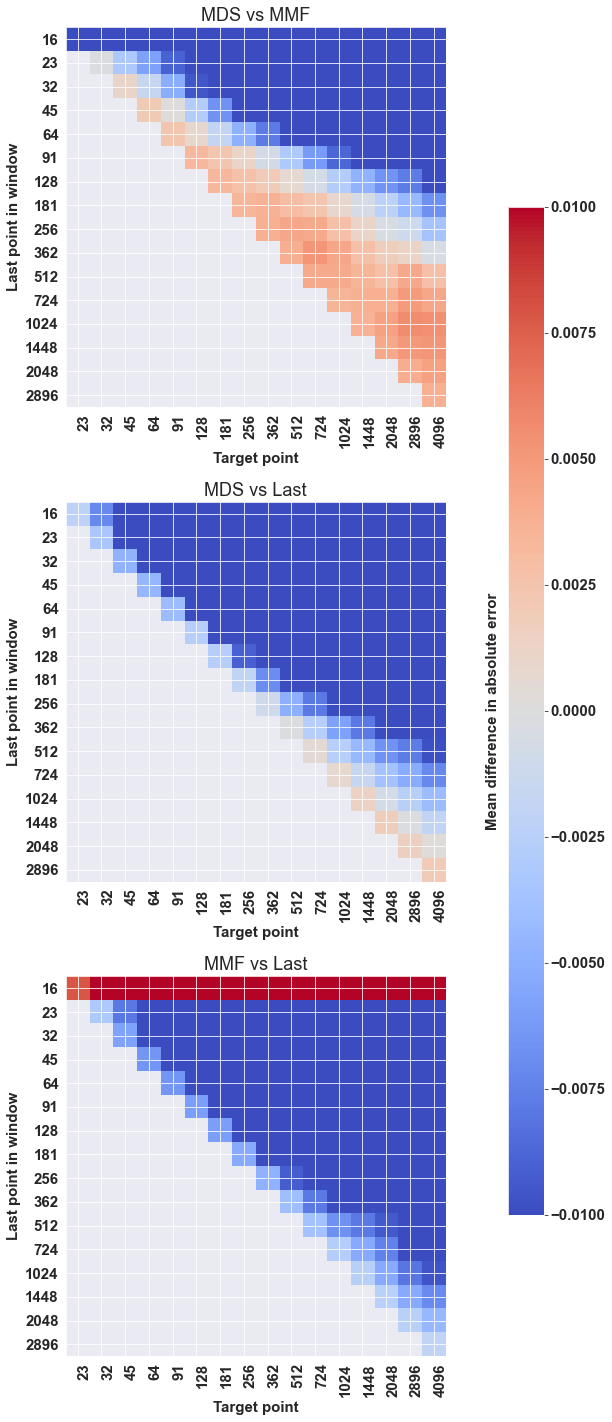

In [38]:
import matplotlib.ticker as tick
fig, ax = plt.subplots(3,1, figsize = (10,20))

meanaveragesMDSvsMMF = np.nanmean(averagesMDSvsMMF, axis = 0)
meanaverageMDSvsLast = np.nanmean(averagesMDSvsLast, axis = 0)
meanaveragesMMFvsLast = np.nanmean(averagesMMFvsLast, axis = 0)

ax[0].imshow(meanaveragesMDSvsMMF, cmap = 'coolwarm', vmin = -0.01, vmax = 0.01)
ax[1].imshow(meanaverageMDSvsLast, cmap = 'coolwarm', vmin = -0.01, vmax = 0.01)
ax[2].imshow(meanaveragesMMFvsLast, cmap = 'coolwarm', vmin = -0.01, vmax = 0.01)

# set title
ax[0].set_title('MDS vs MMF')
ax[1].set_title('MDS vs Last')
ax[2].set_title('MMF vs Last')

# set (tick) labela
for i in range(3):
        ax[i].set_xticks(np.arange(len(win.target_anchors)))
        ax[i].set_yticks(np.arange(len(win.train_anchors)))
        ax[i].set_xticklabels(win.target_anchors)
        ax[i].set_yticklabels(win.train_anchors)
        ax[i].set_xlabel('Target point', weight = 'bold')
        ax[i].set_ylabel('Last point in window', weight = 'bold')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax[i].get_xticklabels(), rotation=90, ha="right",
                 rotation_mode="anchor")

# set colorbar for all subplots the same
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(ax[0].imshow(meanaveragesMDSvsMMF, cmap = 'coolwarm',  vmin = -0.01, vmax = 0.01), cax=cbar_ax)
cb.set_label(label = 'Mean difference in absolute error', weight = 'bold', labelpad=-120)

plt.tight_layout()
plt.savefig('..\Plots\RegressionAggregation3\RegressionAggregation3HeatmapVsZoom.png', dpi = 300)

C:\Users\lkiel\AppData\Local\Temp\ipykernel_8480\3597504341.py:4: RuntimeWarning: Mean of empty slice
  meanaveragesMDSvsMMF = np.nanmean(averagesMDSvsMMF, axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_8480\3597504341.py:5: RuntimeWarning: Mean of empty slice
  meanavearagesMDSvsLast = np.nanmean(averagesMDSvsLast, axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_8480\3597504341.py:6: RuntimeWarning: Mean of empty slice
  meanaveragesMMFvsLast = np.nanmean(averagesMMFvsLast, axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_8480\3597504341.py:33: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(ax[0].imshow(meanaveragesMDSvsMMF, cmap = 'seismic', vmin = -0.01, vmax = 0.01), cax=cbar_ax, label = 'Mean difference in absolute error')


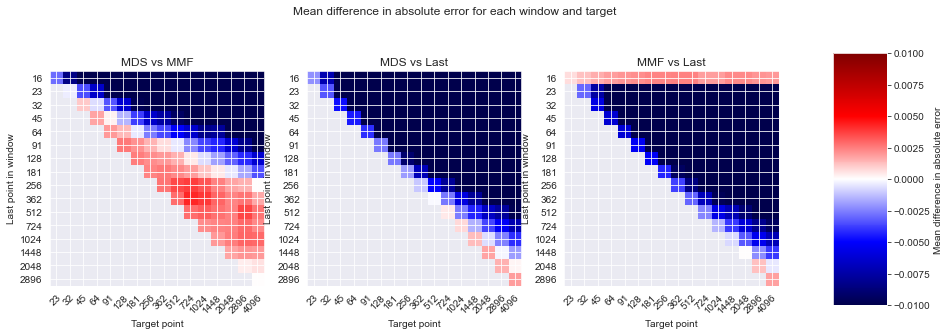

In [82]:
# plot the heatmaps for each side by side
fig, ax = plt.subplots(1,3, figsize = (15,5))

meanaveragesMDSvsMMF = np.nanmean(averagesMDSvsMMF, axis = 0)
meanavearagesMDSvsLast = np.nanmean(averagesMDSvsLast, axis = 0)
meanaveragesMMFvsLast = np.nanmean(averagesMMFvsLast, axis = 0)

ax[0].imshow(meanaveragesMDSvsMMF, cmap = 'seismic', vmin = -0.01, vmax = 0.01)
ax[1].imshow(meanavearagesMDSvsLast, cmap = 'seismic', vmin = -0.01, vmax = 0.01)
ax[2].imshow(meanaveragesMMFvsLast, cmap = 'seismic', vmin = -0.01, vmax = 0.01)

# set title
ax[0].set_title('MDS vs MMF')
ax[1].set_title('MDS vs Last')
ax[2].set_title('MMF vs Last')

# set (tick) labela
for i in range(3):
        ax[i].set_xticks(np.arange(len(win.target_anchors)))
        ax[i].set_yticks(np.arange(len(win.train_anchors)))
        ax[i].set_xticklabels(win.target_anchors)
        ax[i].set_yticklabels(win.train_anchors)
        ax[i].set_xlabel('Target point')
        ax[i].set_ylabel('Last point in window')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax[i].get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

# set colorbar for all subplots the same
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax[0].imshow(meanaveragesMDSvsMMF, cmap = 'seismic', vmin = -0.01, vmax = 0.01), cax=cbar_ax, label = 'Mean difference in absolute error')

# set title
fig.suptitle('Mean difference in absolute error for each window and target')

plt.savefig('..\Plots\RegressionAggregation3\RegressionAggregation3HeatmapSeismicZoom.png', dpi = 800)

TypeError: Invalid shape (248, 20, 16, 16) for image data

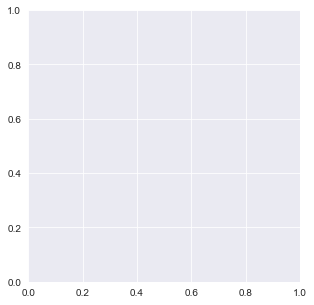

In [73]:
# Now for the difference
fig, ax = plt.subplots(1,1, figsize = (5,5))

ax.imshow(MDSvsMMF, cmap = 'coolwarm', vmin = -0.1, vmax = 0.1)
ax.set_title('MMF - MDS')

# set (tick) labela
ax.set_xticks(np.arange(len(win.target_anchors)))
ax.set_yticks(np.arange(len(win.train_anchors)))
ax.set_xticklabels(win.target_anchors)
ax.set_yticklabels(win.train_anchors)
ax.set_xlabel('Target point')
ax.set_ylabel('Last point in window')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# set colorbar for all subplots the same
fig.colorbar(ax.imshow(MDSvsMMF, cmap = 'coolwarm', vmin = -0.1, vmax = 0.1))

# set title
fig.suptitle('Difference in average test error')

#set background color of plot to black
# ax.set_facecolor('0.9')
# fig.set_facecolor('0.9')

plt.savefig('Plots/heatmap_diff.png', dpi = 800)

C:\Users\lkiel\AppData\Local\Temp\ipykernel_8836\3396683856.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(ax.imshow(averagesMMFvsMDS, cmap = 'coolwarm', vmin = -0.01, vmax = 0.01))


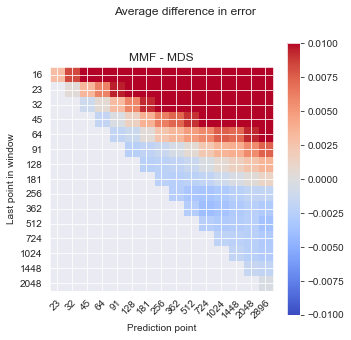

In [19]:
# Same but zoom in
fig, ax = plt.subplots(1,1, figsize = (5,5))

ax.imshow(averagesMDSvsMMF, cmap = 'coolwarm', vmin = -0.01, vmax = 0.01)
ax.set_title('MMF - MDS')

# set (tick) labela
ax.set_xticks(np.arange(len(win.target_anchors)))
ax.set_yticks(np.arange(len(win.train_anchors)))
ax.set_xticklabels(win.target_anchors)
ax.set_yticklabels(win.train_anchors)
ax.set_xlabel('Prediction point')
ax.set_ylabel('Last point in window')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# set colorbar for all subplots the same
fig.colorbar(ax.imshow(averagesMDSvsMMF, cmap = 'coolwarm', vmin = -0.01, vmax = 0.01))

# set title
fig.suptitle('Average difference in error')

plt.savefig('../Plots/mean.png', dpi = 800)

In [74]:
taveragesMDSvsMMF = np.nanmean(MDSvsMMF, axis = (0,1))

C:\Users\lkiel\AppData\Local\Temp\ipykernel_8480\1408501484.py:1: RuntimeWarning: Mean of empty slice
  taveragesMDSvsMMF = np.nanmean(MDSvsMMF, axis = (0,1))


C:\Users\lkiel\AppData\Local\Temp\ipykernel_8480\2259081651.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(ax.imshow(taveragesMDSvsMMF, cmap = 'coolwarm', vmin = -0.01, vmax = 0.01))


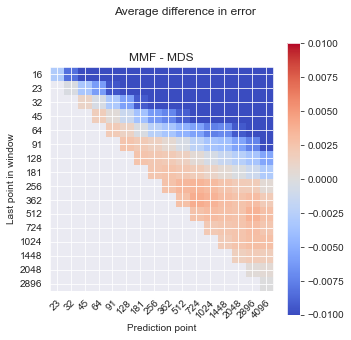

In [75]:
# Same but zoom in
fig, ax = plt.subplots(1,1, figsize = (5,5))

ax.imshow(taveragesMDSvsMMF, cmap = 'coolwarm', vmin = -0.01, vmax = 0.01)
ax.set_title('MMF - MDS')

# set (tick) labela
ax.set_xticks(np.arange(len(win.target_anchors)))
ax.set_yticks(np.arange(len(win.train_anchors)))
ax.set_xticklabels(win.target_anchors)
ax.set_yticklabels(win.train_anchors)
ax.set_xlabel('Prediction point')
ax.set_ylabel('Last point in window')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# set colorbar for all subplots the same
fig.colorbar(ax.imshow(taveragesMDSvsMMF, cmap = 'coolwarm', vmin = -0.01, vmax = 0.01))

# set title
fig.suptitle('Average difference in error')

plt.savefig('../Plots/mean.png', dpi = 800)

In [6]:
MDSreg = win.results['MDS']['regression']
MMFreg = win.results['MMF']['regression']
Lastreg = win.results['Last']['regression']
actual = win.target

In [54]:
Lastreg.shape

(248, 20, 16, 16)

In [52]:
actual.shape

(248, 20, 16)

In [42]:
def Multi(dat):

    # Take nans as 0 for argmax
    nans = np.isnan(dat)
    dat[nans] = 0

    # Get the prediction and put back nans
    pred = np.argmax(dat, axis = 1).astype(float)
    dat[nans] = np.nan

    # Get full nan slices
    nanslices = np.isnan(np.nanmax(dat, axis = 1))

    # Put nanslices to nan
    pred[nanslices] = np.nan

    return pred


In [57]:
MDS = Multi(MDSreg)
MMF = Multi(MMFreg)
Last = Multi(Lastreg)
Actual = Multi(actual)

def Error(pred):
    # keep the nans
    nans = np.isnan(pred)

    # get the error
    error = (pred == Actual[:,np.newaxis]).astype(float)

    # put nans back
    error[nans] = np.nan
    return error

C:\Users\lkiel\AppData\Local\Temp\ipykernel_328\2182599866.py:12: RuntimeWarning: All-NaN slice encountered
  nanslices = np.isnan(np.nanmax(dat, axis = 1))


In [116]:
MDSerr = np.nanmean(Error(MDS), axis = 0)
MMFerr = np.nanmean(Error(MMF), axis = 0)
Lasterr = np.nanmean(Error(Last), axis = 0)

# Bottom left triangle to nan for Last
Lasterr[np.tril_indices(Lasterr.shape[0], -1)] = np.nan

# differences in error
MDSvsMMF = np.nanmean(Error(MDS) - Error(MMF), axis = 0)
MDSvsLast = np.nanmean(Error(MDS) - Error(Last), axis = 0)
MMFvsLast = np.nanmean(Error(MMF) - Error(Last), axis = 0)


C:\Users\lkiel\AppData\Local\Temp\ipykernel_328\2730442336.py:1: RuntimeWarning: Mean of empty slice
  MDSerr = np.nanmean(Error(MDS), axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_328\2730442336.py:2: RuntimeWarning: Mean of empty slice
  MMFerr = np.nanmean(Error(MMF), axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_328\2730442336.py:9: RuntimeWarning: Mean of empty slice
  MDSvsMMF = np.nanmean(Error(MDS) - Error(MMF), axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_328\2730442336.py:10: RuntimeWarning: Mean of empty slice
  MDSvsLast = np.nanmean(Error(MDS) - Error(Last), axis = 0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_328\2730442336.py:11: RuntimeWarning: Mean of empty slice
  MMFvsLast = np.nanmean(Error(MMF) - Error(Last), axis = 0)


In [56]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams.update({'font.weight': 'bold'})

C:\Users\lkiel\AppData\Local\Temp\ipykernel_328\777963182.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(ax[0].imshow(MDSerr, cmap = 'coolwarm', vmin=0, vmax=1), cax=cbar_ax)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_328\777963182.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


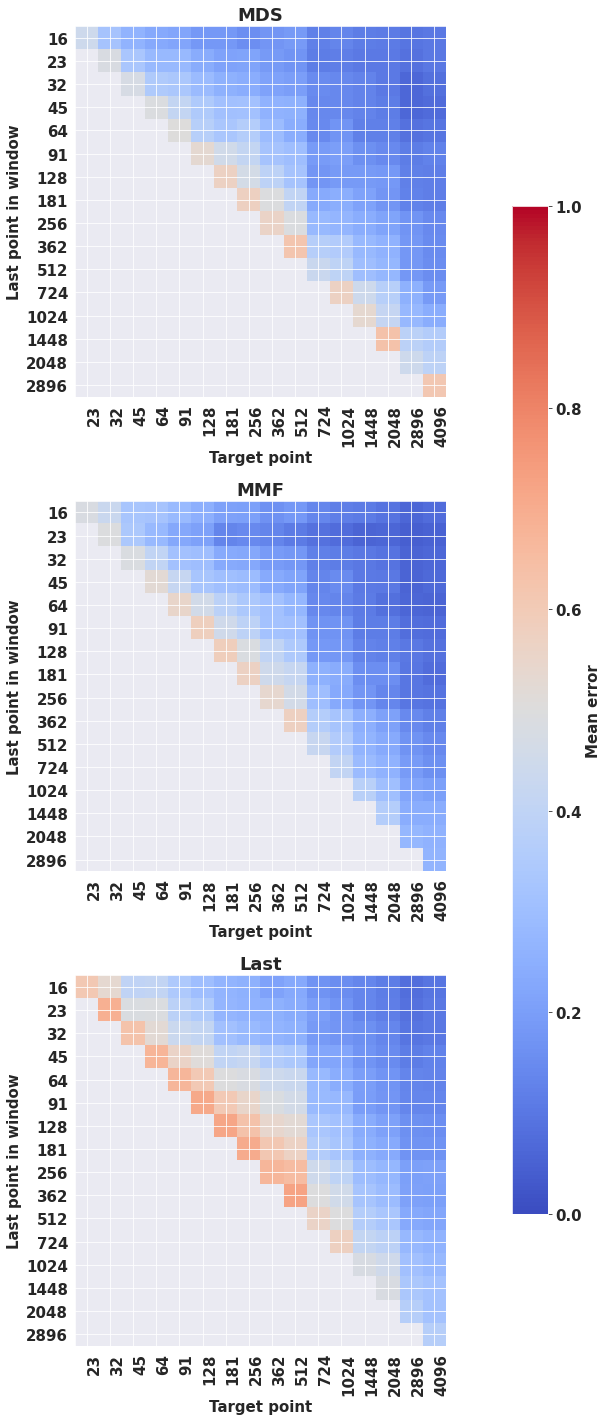

In [120]:
fig, ax = plt.subplots(3,1, figsize = (10,20))

ax[0].imshow(MDSerr, cmap = 'coolwarm', vmin=0, vmax=1)
ax[1].imshow(MMFerr, cmap = 'coolwarm', vmin=0, vmax=1)
ax[2].imshow(Lasterr, cmap = 'coolwarm', vmin=0, vmax=1)

# set title
ax[0].set_title('MDS', weight = 'bold')
ax[1].set_title('MMF', weight = 'bold')
ax[2].set_title('Last', weight = 'bold')

# set (tick) labela
for i in range(3):
        ax[i].set_xticks(np.arange(len(win.target_anchors)))
        ax[i].set_yticks(np.arange(len(win.train_anchors)))
        ax[i].set_xticklabels(win.target_anchors)
        ax[i].set_yticklabels(win.train_anchors)
        ax[i].set_xlabel('Target point', weight = 'bold')
        ax[i].set_ylabel('Last point in window', weight = 'bold')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax[i].get_xticklabels(), rotation=90, ha="right",
                 rotation_mode="anchor")

# set colorbar for all subplots the same
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(ax[0].imshow(MDSerr, cmap = 'coolwarm', vmin=0, vmax=1), cax=cbar_ax)
cb.set_label(label = 'Mean error', weight = 'bold')

plt.tight_layout()
plt.savefig('../Plots/Multi', dpi = 300)

C:\Users\lkiel\AppData\Local\Temp\ipykernel_328\1033959759.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(ax[0].imshow(MDSvsMMF, cmap = 'coolwarm', vmin=-1, vmax=1), cax=cbar_ax)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_328\1033959759.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


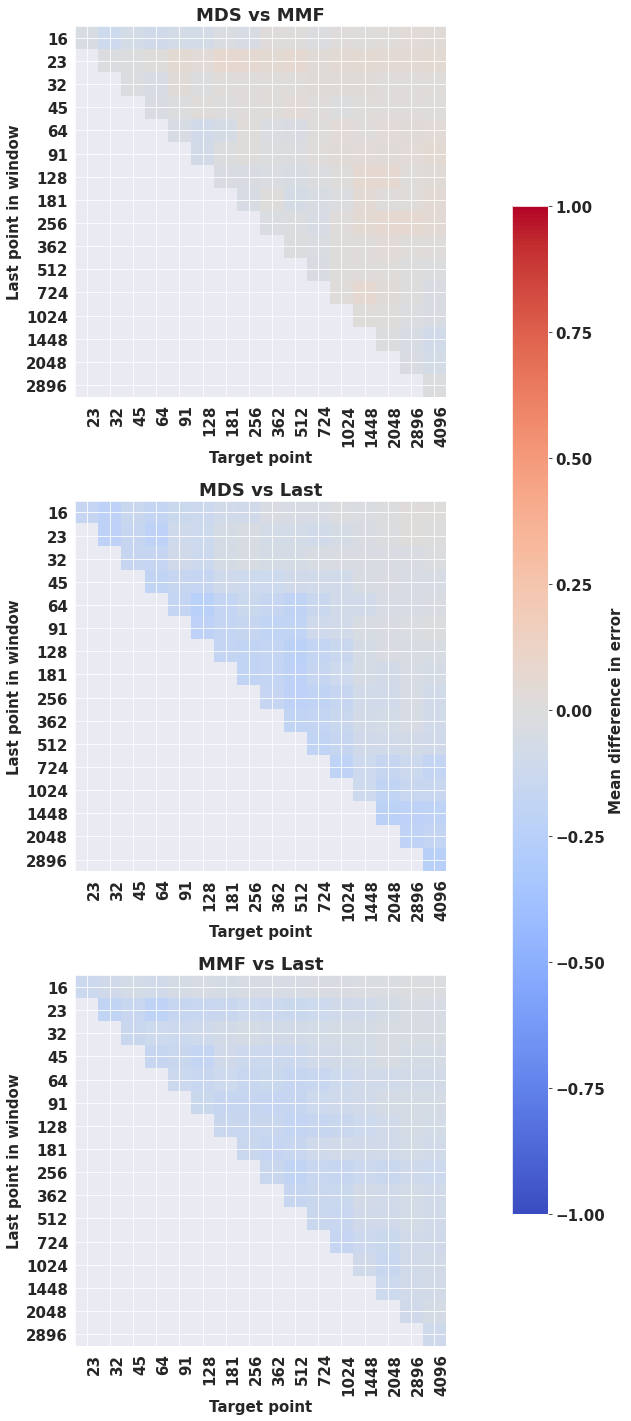

In [123]:
fig, ax = plt.subplots(3,1, figsize = (10,20))

ax[0].imshow(MDSvsMMF, cmap = 'coolwarm', vmin=-1, vmax=1)
ax[1].imshow(MDSvsLast, cmap = 'coolwarm', vmin=-1, vmax=1)
ax[2].imshow(MMFvsLast, cmap = 'coolwarm', vmin=-1, vmax=1)

# set title
ax[0].set_title('MDS vs MMF', weight = 'bold')
ax[1].set_title('MDS vs Last', weight = 'bold')
ax[2].set_title('MMF vs Last', weight = 'bold')

# set (tick) labela
for i in range(3):
        ax[i].set_xticks(np.arange(len(win.target_anchors)))
        ax[i].set_yticks(np.arange(len(win.train_anchors)))
        ax[i].set_xticklabels(win.target_anchors)
        ax[i].set_yticklabels(win.train_anchors)
        ax[i].set_xlabel('Target point', weight = 'bold')
        ax[i].set_ylabel('Last point in window', weight = 'bold')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax[i].get_xticklabels(), rotation=90, ha="right",
                 rotation_mode="anchor")

# set colorbar for all subplots the same
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(ax[0].imshow(MDSvsMMF, cmap = 'coolwarm', vmin=-1, vmax=1), cax=cbar_ax)
cb.set_label(label = 'Mean difference in error', weight = 'bold')

plt.tight_layout()
plt.savefig('../Plots/MultiVs', dpi = 300)